## Model Training and Hyper parameter Tuning

* Loaded preprecessed Dataset created from `"dataPreprocess.ipnyb"` script
* Spliting Dataset into trainig and testing data
* Training model and evaluating using multiple performance measure
* List Models trained - *1) Logistic Regression 2) Decision Tree 3) Random Forest 4) SVC 5) Extra Trees*
* Saved Best model; so that, it can be used while making prediction for using input in `"autism-app.py"` script 

In [1]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    from sklearn.model_selection import train_test_split
    import pickle

    #ML ALgorithm
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.ensemble import ExtraTreesClassifier

    #Peformance Measures
    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
    
except ModuleNotFoundError as err:
    print('Package/Module not found in model-training.ipnyb file' )
    
%matplotlib inline

### Loading Preprocessed Data

In [2]:
# Function to load dataset into dataframe

def load_data(filename):
    #path = 'C:/Abhi/github_projects/data/'
    
    try:
        #full_path = os.path.join(path, filename)
        return pd.read_csv(filename)
    
    except FileNotFoundError as err:
        print('Input data file is not found in dataExploration.py file')
        print(err)
        
    except:
        print('Isse when loading input CSV data in dataExploration.py file')      


df_processed = load_data('preprocessed_data.csv')

### Spliting Dataset into Train and validation split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df_processed.drop('Class/ASD', axis=1), df_processed['Class/ASD'],
                                                  test_size=0.25, stratify=df_processed['Class/ASD'], random_state=42)

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((600, 52), (600,), (200, 52), (200,))

In [5]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
250,0.135983,0.523412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
760,0.173588,0.839423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
450,0.988233,0.856823,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
152,0.343310,0.815450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
733,0.327592,0.766204,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


### Model Training

#### 1) Logistic Regression

In [6]:
#lg = LogisticRegression(solver='sagaRandomForestClassifier', max_iter=300, penalty='elasticnet',C=0.1, l1_ratio=0.45, random_state=42)
lg = LogisticRegression(solver='newton-cg', max_iter=300, penalty='l2',C=0.1, l1_ratio= None, random_state=42)
lg.fit(X_train, y_train)

print('Train Accuracy: ',lg.score(X_train, y_train))

pred = lg.predict(X_test)

print('Test Accuracy: ', accuracy_score(pred, y_test))
print('f1 Score: ', f1_score(pred, y_test))
print('Confusion Matrix:\n ', confusion_matrix(pred, y_test))

Train Accuracy:  0.8816666666666667
Test Accuracy:  0.885
f1 Score:  0.7160493827160495
Confusion Matrix:
  [[148  11]
 [ 12  29]]


#### 2) Decision Tree 

In [7]:
dt = DecisionTreeClassifier(min_samples_leaf= 30, random_state=42) #Now we are specifying min_samples_leaf at the time of creating object of DecisionTreeClassifier
dt.fit(X_train, y_train)
print('Train Accuracy: ',dt.score(X_train, y_train))

pred = dt.predict(X_test)

print('Test Accuracy: ', accuracy_score(pred, y_test))
print('f1 Score: ', f1_score(pred, y_test))
print('Confusion Matrix:\n ', confusion_matrix(pred, y_test))

Train Accuracy:  0.8716666666666667
Test Accuracy:  0.875
f1 Score:  0.6575342465753425
Confusion Matrix:
  [[151  16]
 [  9  24]]


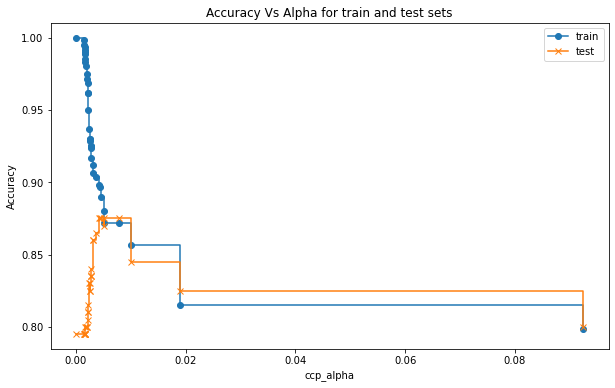

In [8]:
dt = DecisionTreeClassifier(random_state=42)
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas , path.impurities


# Train multiple Decision Tree Models by setting ccp_alphas values from above array as hyper parameter
#of classifiers and append each model in list dts
dts = []

for ccp in ccp_alphas:
    dt = DecisionTreeClassifier(ccp_alpha= ccp,random_state=42)
    dt.fit(X_train, y_train)
    dts.append(dt)

#Getting the Train Accuracy score and Test Accuracy Score of each model and saving scores in the corresponding lists
train_scores = [dt.score(X_train, y_train) for dt in dts]
test_scores = [dt.score(X_test, y_test) for dt in dts]


# Accuracy Vs Alphas for training and test sets
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('ccp_alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Vs Alpha for train and test sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='x', label='test',  drawstyle='steps-post')
ax.legend()
plt.show()

In [9]:
'''
Tried some ccp_alpha values between 0.005 and 0.02 and got best result on ccp_alpha=0.007
'''

dt = DecisionTreeClassifier(ccp_alpha= 0.007,random_state=42)
dt.fit(X_train, y_train)
print('Training Accuracy: ',dt.score(X_train, y_train))

pred = dt.predict(X_test)
print('Test Accuracy: ', accuracy_score(pred, y_test))
print('f1 Score: ', f1_score(pred, y_test))
print('Confusion Matrix:\n ', confusion_matrix(pred, y_test))

Training Accuracy:  0.8716666666666667
Test Accuracy:  0.875
f1 Score:  0.6575342465753425
Confusion Matrix:
  [[151  16]
 [  9  24]]


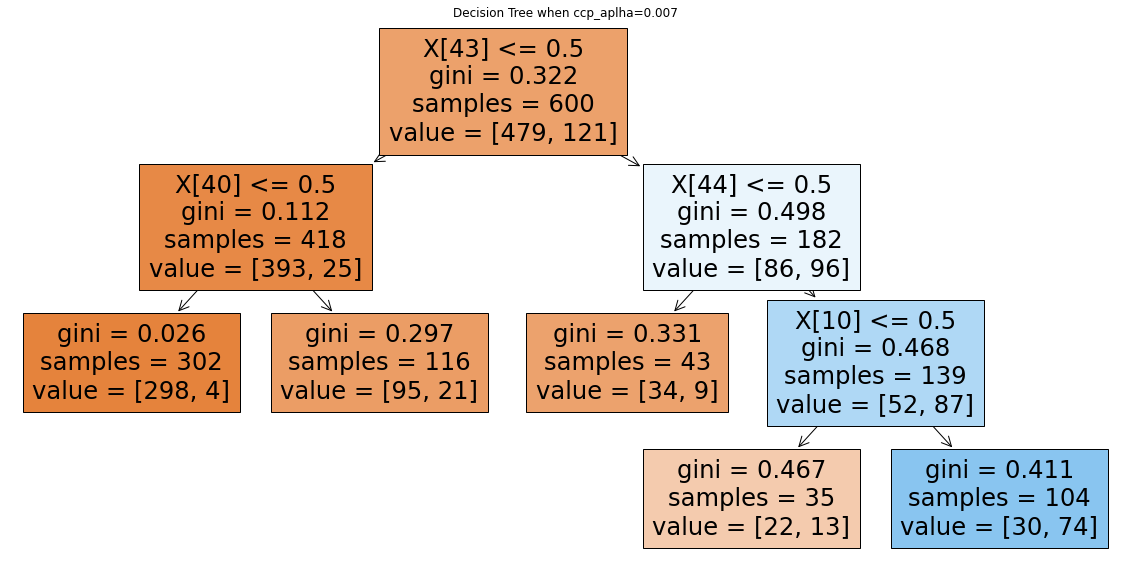

In [10]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt, filled=True)
plt.title('Decision Tree when ccp_aplha=0.007')
plt.show()

#### 3) Random Forest

In [11]:
rf = RandomForestClassifier(n_estimators=50, class_weight='balanced',ccp_alpha=0.05, random_state=42)
rf.fit(X_train, y_train)

print('Training Accuracy: ',rf.score(X_train, y_train))

pred = rf.predict(X_test)
print('Test Accuracy: ', accuracy_score(pred, y_test))
print('f1 Score: ', f1_score(pred, y_test))
print('Confusion Matrix:\n ', confusion_matrix(pred, y_test))


Training Accuracy:  0.82
Test Accuracy:  0.8
f1 Score:  0.6363636363636364
Confusion Matrix:
  [[125   5]
 [ 35  35]]


#### 4) SVC

In [12]:
svc = SVC(kernel='rbf', C=0.45, gamma=0.07,probability=True)
#svc = SVC(kernel='poly', degree=4, C=0.65, gamma=0.065)
svc.fit(X_train, y_train)

print('Training Accuracy: ',svc.score(X_train, y_train))

pred = svc.predict(X_test)
print('Test Accuracy: ', accuracy_score(pred, y_test))
print('f1 Score: ', f1_score(pred, y_test))
print('Confusion Matrix:\n ', confusion_matrix(pred, y_test))


Training Accuracy:  0.8816666666666667
Test Accuracy:  0.885
f1 Score:  0.7228915662650603
Confusion Matrix:
  [[147  10]
 [ 13  30]]


#### Extra Trees

In [13]:
ext = ExtraTreesClassifier(max_depth=5,min_samples_split=2 ,min_samples_leaf=5, random_state= 42, criterion='entropy')
ext.fit(X_train, y_train)

print('Training Accuracy: ',ext.score(X_train, y_train))

pred = ext.predict(X_test)
print('Test Accuracy: ', accuracy_score(pred, y_test))
print('f1 Score: ', f1_score(pred, y_test))
print('Confusion Matrix:\n ', confusion_matrix(pred, y_test))

Training Accuracy:  0.8816666666666667
Test Accuracy:  0.865
f1 Score:  0.64
Confusion Matrix:
  [[149  16]
 [ 11  24]]


In [14]:
pred = ext.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, pred) )
print('F1-score: ', f1_score(y_test, pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, pred))

Accuracy:  0.865
F1-score:  0.64
Confusion Matrix:
  [[149  11]
 [ 16  24]]


### Saving model

In [15]:
'''
* SVC has highest f1-score; therefore, saving SVC model
* f1-score is better performance measure than Accuracy when Dataset is imbalanced.
'''

filename = 'autism_model.pkl'
pickle.dump(svc, open(filename, 'wb'))